<a href="https://colab.research.google.com/github/pablocort/git-and-github-fundamentals-pablocort/blob/first-draft-content/Taller1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align = "center"> Taller 1 <h1>

In [28]:
!pip install google

In [29]:
#Cargar todas las librerías necesarias
import pandas as pd
import numpy as np
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm 
from google.colab import drive
import matplotlib as m
import math
from sklearn.impute import KNNImputer

In [30]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
# Cargar base de datos
housing = pd.read_csv("/content/drive/MyDrive/co_properties.csv", encoding="utf-8")

In [32]:
housing.columns

Index(['id', 'ad_type', 'start_date', 'end_date', 'created_on', 'lat', 'lon',
       'l1', 'l2', 'l3', 'l4', 'l5', 'l6', 'rooms', 'bedrooms', 'bathrooms',
       'surface_total', 'surface_covered', 'price', 'currency', 'price_period',
       'title', 'description', 'property_type', 'operation_type'],
      dtype='object')

In [33]:
#filtramos aquellos que se ubican en Medellín, Bogotá y Cali 
houses = housing[(housing['l3'] == 'Bogotá D.C') | (housing['l3'] == 'Cali') | (housing['l3'] == 'Medellín')]
houses = houses[(houses['operation_type'] == 'Venta')]

houses['l3'].value_counts()

Bogotá D.C    129996
Cali           52877
Medellín       51643
Name: l3, dtype: int64

In [34]:
#borramos NA unicamente de las variables Price, currency (variable moneda) y L3 (variable municipio)
#porque las observaciones que no tienen estos datos no aportan nada al análisis

houses = houses.dropna(subset= ['price', 'currency', 'l3'])
houses.isna().sum()

id                      0
ad_type                 0
start_date              0
end_date                0
created_on              0
lat                 31570
lon                 31570
l1                      0
l2                      0
l3                      0
l4                  52517
l5                 122821
l6                 196431
rooms              148604
bedrooms           147145
bathrooms           30644
surface_total      151878
surface_covered    152186
price                   0
currency                0
price_period       226218
title                  33
description            13
property_type           0
operation_type          0
dtype: int64

In [35]:
housing["l4"].unique()

array(['Zona Sur', nan, 'Candelaria', 'Zona Centro', 'Belén', 'Castilla',
       'Buenos Aires', 'La América', 'El Poblado', 'Robledo',
       'Zona Chapinero', 'Zona Noroccidental', 'Pance', 'Lili',
       'Zona Norte', 'Zona Occidental', 'Zona Suroccidental',
       'San Javier', 'Palmitas', 'Santa Isabel', 'Usaquén',
       'Nuevo Horizonte', 'Los Mártires', 'Caney', 'La Flora', 'Laureles',
       'Teusaquillo', 'Engativa', 'Barrios Unidos', 'El Recreo', 'Olaya',
       'Puente Aranda', 'Antonio Nariño', 'San Alonso',
       'Paseo de la Castellana', 'El Ingenio', 'Aranjuez',
       'Villa Hermosa', 'San Cristóbal', 'Ciudad Jardín', 'Manrique',
       'Popular', 'El Prado', 'Ríomar', 'Las Palmas', 'Guayabal',
       'El Limonar', 'San Fernando Viejo', 'San Fernando Nuevo',
       'San Antonio de Prado', 'Norte-Centro Histórico',
       'Doce de Octubre', 'Santa Elena', 'Altavista', 'Antonia Santos',
       'Alarcón', 'Bosa', 'San Felipe', 'Santa Cruz', 'Tunjuelito',
       'Ciudad B

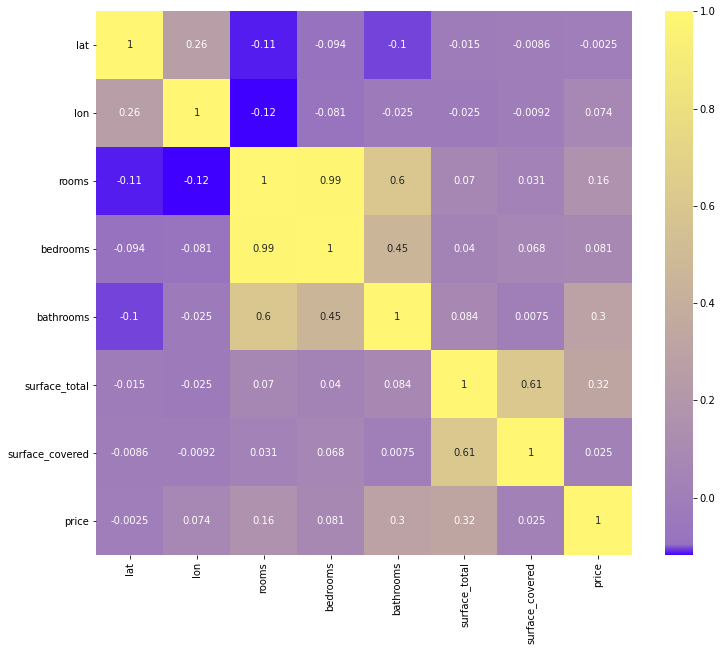

In [36]:
cdict = {
  'red'  :  ( (0.0, 0.25, .25), (0.02, .59, .59), (1., 1., 1.)),
  'green':  ( (0.0, 0.0, 0.0), (0.02, .45, .45), (1., .97, .97)),
  'blue' :  ( (0.0, 1.0, 1.0), (0.02, .75, .75), (1., 0.45, 0.45))
}

cm = m.colors.LinearSegmentedColormap('colormap', cdict, 1024)

plt.figure(figsize=(12,10))
cor = houses.corr()
sns.heatmap(cor, annot=True, cmap=cm)
plt.show()

In [37]:
variables = ["lat", "lon", "l3", "rooms", "bathrooms", "bedrooms","surface_total", "surface_covered",
             "price", "currency", "property_type"]

In [38]:
houses = houses[variables]

In [39]:
houses.reset_index(inplace=True, drop=True)
houses.head()

,lat,lon,l3,rooms,bathrooms,bedrooms,surface_total,surface_covered,price,currency,property_type
0,4.577,-74.153,Bogotá D.C,nan,2.000,nan,nan,350.000,1600000000.000,COP,Casa
1,6.253,-75.565,Medellín,nan,nan,nan,15850.000,nan,9510000000.000,COP,Lote
2,4.607,-74.076,Bogotá D.C,nan,nan,nan,727.000,2800.000,8800000000.000,COP,Otro
3,6.253,-75.606,Medellín,3.000,2.000,3.000,103.000,103.000,235000000.000,COP,Casa
4,6.252,-75.598,Medellín,3.000,2.000,3.000,89.000,89.000,380000000.000,COP,Apartamento


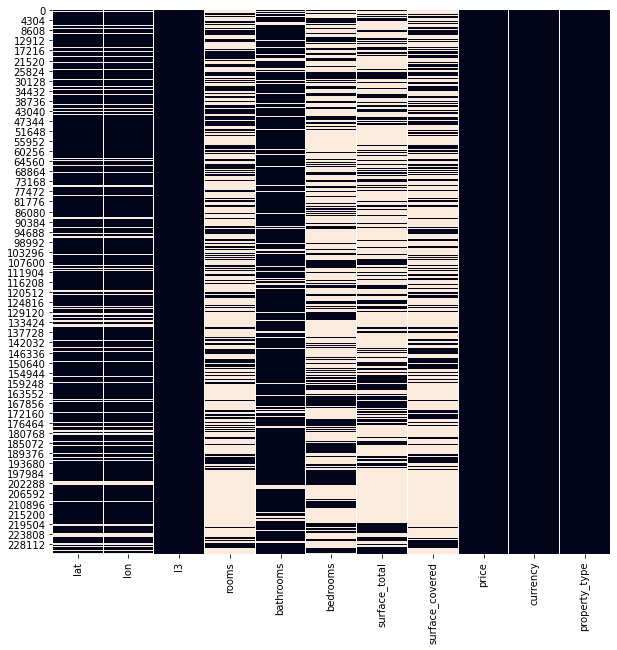

In [40]:
plt.figure(figsize=(10,10))
sns.heatmap(houses.isnull(), cbar=False)

In [41]:
houses[["lat", "lon", "l3"]] = houses[["lat", "lon", "l3"]].groupby("l3").apply(lambda group: group.interpolate(method="linear"))
#houses[["lat", "lon"]] = houses[["lat", "lon"]].interpolate(method="linear")

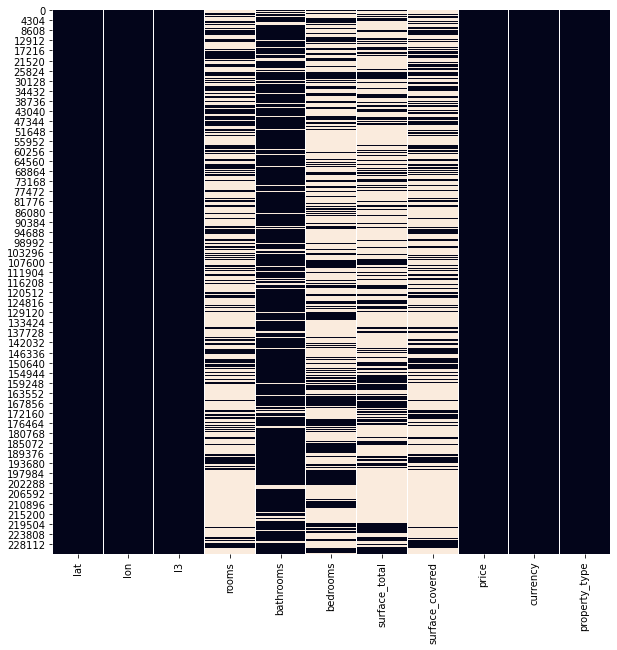

In [42]:
plt.figure(figsize=(10,10))
sns.heatmap(houses.isnull(), cbar=False)

In [43]:
houses["l3"] = houses["l3"].astype("category")

In [44]:
houses["ciudades_encoded"] = houses["l3"].cat.codes
houses.head()

,lat,lon,l3,rooms,bathrooms,bedrooms,surface_total,surface_covered,price,currency,property_type,ciudades_encoded
0,4.577,-74.153,Bogotá D.C,nan,2.000,nan,nan,350.000,1600000000.000,COP,Casa,0
1,6.253,-75.565,Medellín,nan,nan,nan,15850.000,nan,9510000000.000,COP,Lote,2
2,4.607,-74.076,Bogotá D.C,nan,nan,nan,727.000,2800.000,8800000000.000,COP,Otro,0
3,6.253,-75.606,Medellín,3.000,2.000,3.000,103.000,103.000,235000000.000,COP,Casa,2
4,6.252,-75.598,Medellín,3.000,2.000,3.000,89.000,89.000,380000000.000,COP,Apartamento,2


In [45]:
# 0: Bogotá, 1: Cali, 2: Medellín
houses.drop(axis=1, columns="l3", inplace=True)

In [46]:
houses["property_type"].value_counts()

Apartamento        114179
Casa                64087
Otro                38466
Oficina              5848
Local comercial      4945
Lote                 2880
Finca                 874
Depósito              735
Parqueadero           343
PH                     21
Name: property_type, dtype: int64

In [47]:
houses["property_type"] = houses["property_type"].astype("category")

In [48]:
houses["property_encoded"] = houses["property_type"].cat.codes

In [49]:
houses[["property_type", "property_encoded"]].drop_duplicates().sort_values("property_encoded")

,property_type,property_encoded
4,Apartamento,0
0,Casa,1
181,Depósito,2
131,Finca,3
15,Local comercial,4
1,Lote,5
16,Oficina,6
2,Otro,7
178589,PH,8
1983,Parqueadero,9


In [50]:
houses.drop(columns="property_type", inplace=True)

In [51]:
houses[houses["currency"]=="USD"]["price"] = houses["price"]/3500

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [52]:
houses.drop(columns="currency", inplace=True)

In [53]:
imputer = KNNImputer(n_neighbors=10)
houses = imputer.fit_transform(houses)

In [ ]:
houses = pd.DataFrame(houses)
houses.columns = ["lat", "lon", "l3",	"rooms	bedrooms",
                  "surface_total", "surface_covered", "price",	"ciudades_encoded", "property_encoded"]

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


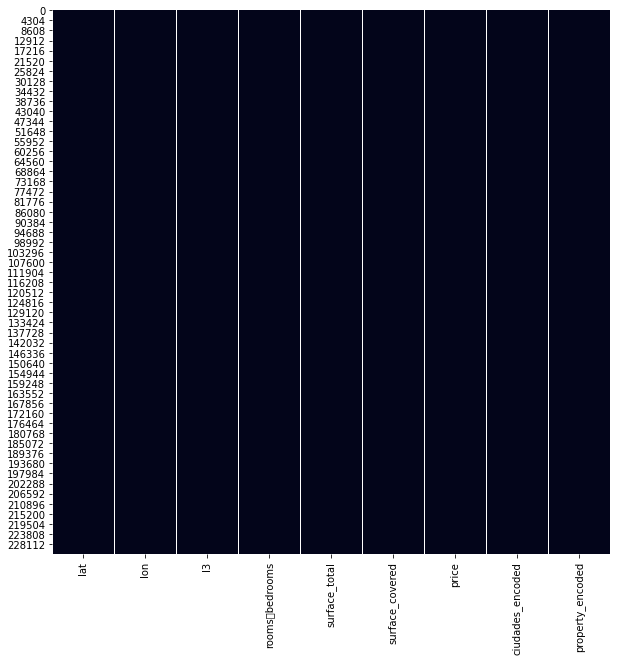

In [ ]:
plt.figure(figsize=(10,10));
sns.heatmap(houses.isnull(), cbar=False);

In [ ]:
houses.to_excel("houses_imputed.xlsx")

In [ ]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232378 entries, 0 to 232377
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   lat              200808 non-null  float64
 1   lon              200808 non-null  float64
 2   l3               232378 non-null  object 
 3   rooms            83774 non-null   float64
 4   bedrooms         85233 non-null   float64
 5   surface_total    80500 non-null   float64
 6   surface_covered  80192 non-null   float64
 7   price            232378 non-null  float64
 8   currency         232378 non-null  object 
 9   property_type    232378 non-null  object 
 10  operation_type   232378 non-null  object 
dtypes: float64(7), object(4)
memory usage: 19.5+ MB


# Sección nueva

In [ ]:
houses.isna().sum()

lat                 31570
lon                 31570
l3                      0
l6                 196431
rooms              148604
bedrooms           147145
surface_total      151878
surface_covered    152186
price                   0
currency                0
property_type           0
operation_type          0
dtype: int64

In [ ]:

#
#Crear variables de precio por metro 2
#

housing['price_metro2'] = housing['price'] / housing['surface_total']

housing['price_metro2_cover'] = (housing['price'] / housing['surface_covered'])

housing.count()

id                    878103
ad_type               878103
start_date            878103
end_date              878103
created_on            878103
lat                   743969
lon                   743969
l1                    878103
l2                    878103
l3                    801092
l4                    305314
l5                    171341
l6                     57236
rooms                 258729
bedrooms              332720
bathrooms             736201
surface_total         308817
surface_covered       259213
price                 869650
currency              869414
price_period           25879
title                 878064
description           878048
property_type         878103
operation_type        878103
price_metro2          304561
price_metro2_cover    256549
dtype: int64

In [ ]:
#
#
# Eliminar Valores negativos


In [ ]:
#
#
# diferenciar opetration type

In [ ]:
#
#
#Revisamos variables y missing values

housing.head()
housing.isna().sum()

id                         0
ad_type                    0
start_date                 0
end_date                   0
created_on                 0
lat                   134134
lon                   134134
l1                         0
l2                         0
l3                     77011
l4                    572789
l5                    706762
l6                    820867
rooms                 619374
bedrooms              545383
bathrooms             141902
surface_total         569286
surface_covered       618890
price                   8453
currency                8689
price_period          852224
title                     39
description               55
property_type              0
operation_type             0
price_metro2          573542
price_metro2_cover    621554
dtype: int64

In [ ]:
houses_1.groupby('l3').agg({'price_metro2_cover':'mean'})

,price_metro2_cover
l3,
Bogotá D.C,5330248.657
Cali,4992451.734
Medellín,3769145.014
Soledad,5427704.721


In [ ]:
houses_1['precio_prom'] = mean((houses_1['price_metro2']))


,rooms,bathrooms,surface_total,surface_covered,price,price_metro2,price_metro2_cover
count,118905.000,328049.000,130142.000,123112.000,376881.000,130142.000,123112.000
mean,3.106,2.658,355.251,399.497,545648037.508,2816520.643,4951703.508
std,1.857,1.579,3375.783,36203.605,2160778354.549,19118931.039,116549149.163
min,1.000,1.000,-36.000,1.000,1200.000,-14444444.444,9.333
25%,2.000,2.000,65.000,66.000,3240000.000,27500.000,37209.302
50%,3.000,2.000,100.000,102.000,220000000.000,2150268.817,2811910.377
75%,3.000,3.000,194.000,190.000,550000000.000,4088725.490,4787234.043
max,40.000,20.000,198000.000,12000000.000,165000000000.000,4125000000.000,20520000000.000


In [ ]:
houses_1[['rooms','bathrooms','surface_total','surface_covered','price'
         , 'price_metro2', 'price_metro2_cover']].describe()

,rooms,bathrooms,surface_total,surface_covered,price,price_metro2,price_metro2_cover
count,119285.000,329176.000,130750.000,123555.000,378245.000,130750.000,123555.000
mean,3.105,2.654,357.947,407.591,546978771.449,2824505.316,4953410.185
std,1.855,1.579,3399.140,36220.120,2205542827.716,19825440.254,116471060.629
min,1.000,1.000,-36.000,1.000,1200.000,-14444444.444,9.333
25%,2.000,2.000,65.000,66.000,3230000.000,27551.086,37037.037
50%,3.000,2.000,100.000,102.000,219900000.000,2136363.636,2800000.000
75%,3.000,3.000,193.000,190.000,550000000.000,4078879.263,4782608.696
max,40.000,20.000,198000.000,12000000.000,165000000000.000,4125000000.000,20520000000.000
